In [51]:
import kagglehub
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import numpy as np



def remove_outlayers(df,cols):
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return df[~((df[cols]<lower) | (df[cols]>upper)).any(axis=1)]


path= kagglehub.dataset_download("sohier/calcofi")

print("path to datasat file: ", path)
df=pd.read_csv(f"{path}/bottle.csv")

df.describe
print(df.head())
print(df.info())

print(df.count())
df=df.dropna(subset=["Depthm","T_degC"])
print(df.count())

df_clean=remove_outlayers(df,["Depthm","T_degC"])
print(df_clean.count())

print(df['Depthm'].count())
print(df['T_degC'].count())

print(np.mean(df['T_degC']))
print(np.std(df['T_degC']))
print(df['T_degC'].skew())
print(df['T_degC'].kurtosis())
print()
print(np.mean(df['Depthm']))
print(np.std(df['Depthm']))
print(df['Depthm'].skew())
print(df['Depthm'].kurtosis())

Using Colab cache for faster access to the 'calcofi' dataset.
path to datasat file:  /kaggle/input/calcofi


/tmp/ipython-input-3770554914.py:23: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(f"{path}/bottle.csv")


   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [58]:

shallow=df[df['Depthm']<50]['T_degC']
deep=df[df['Depthm']>50]['T_degC']


shallow_sample=shallow.sample(5000,random_state=1)
deep_sample=deep.sample(5000,random_state=1)
print(shallow_sample.count())
print(deep_sample.count())

print(stats.shapiro(shallow_sample))
print(stats.shapiro(deep_sample))

print(stats.levene(shallow_sample,deep_sample))



u,p=stats.mannwhitneyu(shallow_sample,deep_sample)
print(u,p)



5000
5000
ShapiroResult(statistic=np.float64(0.9728114993252368), pvalue=np.float64(8.098904997428453e-30))
ShapiroResult(statistic=np.float64(0.9800307747534567), pvalue=np.float64(5.822826113845959e-26))
LeveneResult(statistic=np.float64(1.9605334657462405), pvalue=np.float64(0.16148730728841829))
23527501.0 0.0


odbacujemo H0 zato što podaci nisu normalno zato što je pvalue manji od 0.05, ni jedan ni drugi nisu normalno rasodjeljeni
za levena ne odbacujemo H0 zato što je p veći od 0.05
Koristio sam mannwhitney zato što nije normalno distribuirano


-0.009123271687123485 12.884373860810557 -0.6812014451784331 0.0 1.0610603809082081e-05 0.46403540891318573


<function matplotlib.pyplot.show(close=None, block=None)>

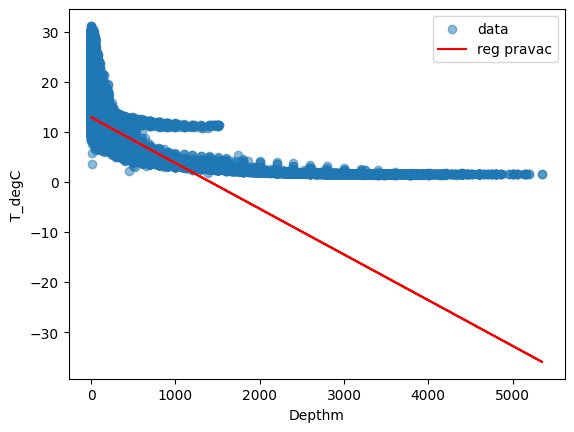

In [57]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

x=df['Depthm']
y=df['T_degC']
slope,intercept,r,p,std_err=linregress(x,y)
print(slope,intercept,r,p,std_err,r*r)

plt.scatter(x,y,alpha=0.5,label="data")
plt.plot(x,intercept+slope*x,color="red",label="reg pravac")
plt.xlabel('Depthm')
plt.ylabel('T_degC')
plt.legend()
plt.show

vidimo da sa povećanom dubinom temperatura pada tj ako je plitko vidimo da je toplije a ako je duboko vidimo da je temperatura i do -30
mjera toćnosti modela je :
0.46403540891318573

Dobili smo očekivane rezultate

pre:
-0.2445505903114016
-0.020708498603080105
post:
-0.19646070213743871
-0.40384254329319225
ShapiroResult(statistic=np.float64(0.9679852884200666), pvalue=np.float64(0.11620561928825013))
ShapiroResult(statistic=np.float64(0.9842729324869284), pvalue=np.float64(0.6323036477521675))
-3.016041066827344 0.003136869181531365


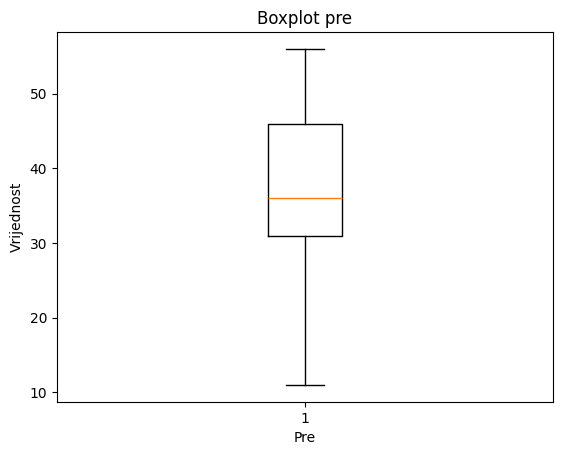

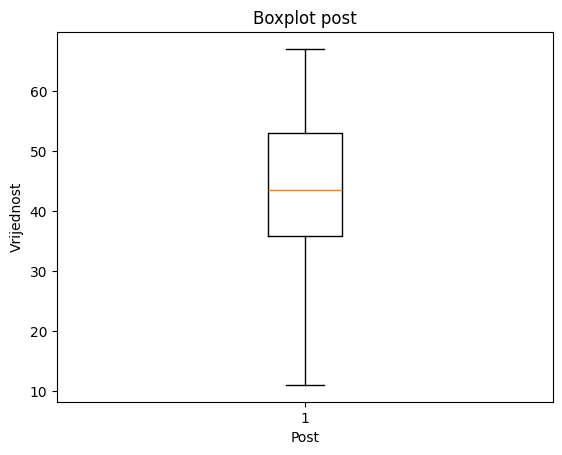

In [72]:
data=pd.read_excel('ispitanici.xlsx')

data.describe()
print("pre:")

print(data['Pre'].skew())
print(data['Pre'].kurtosis())

print("post:")

print(data['Post'].skew())
print(data['Post'].kurtosis())



print(stats.shapiro(data['Pre']))
print(stats.shapiro(data['Post']))

t,p=stats.ttest_ind(data['Pre'],data['Post'])
print(t,p)

plt.boxplot(data["Pre"])
plt.xlabel("Pre")
plt.ylabel("Vrijednost")
plt.title("Boxplot pre")
plt.show()

plt.boxplot(data["Post"])
plt.xlabel("Post")
plt.ylabel("Vrijednost")
plt.title("Boxplot post")
plt.show()

koristit će mo parni test zato što je p value u oba slučaja veći od 0.05
Vidimo  na boxplotu da nema outlayeara

Postoji značajna razlia između toga.